In [9]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Research Question 3: How does a wiki-style tagging approach match up with the explicitly-tagged opioid projects?

## RQ 3.1: How do explicitly tagged opioids projects match up with our wiki-tagged approach for FY18 data?

FY 2018 data

| **Tagging**  | # projects | Costs ($m) |
|--------------|------------|------------|
|Explicit-only | 367        | 161        |
|Wiki-only     | 1,392      | 516        |
|Both          | 956        | 418        |
|Neither       | 89,398     | 36,754     |
  
  
## RQ 3.2: How do the tags compare on 10 years of data?  

10 years of data  

| **Tagging**  | # projects | Costs ($m) |
|--------------|------------|------------|
|Explicit-only | 2,166      | 1,004      |
|Wiki-only     | 15,400     | 5,446      |
|Both          | 6,146      | 2,249      |
|Neither       | 904,971    | 342,440    |


In [2]:
### SET UP THE NOTEBOOK ###

import pandas as pd
import numpy as np
import re # for regular expressions
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
pd.options.display.max_columns = 25 # set pandas maximum number of columns displayed

# cd to the directory with data
# %cd '/path/to/your/data'

In [3]:
# Load data into dataframe
raw_abstracts = (pd.read_csv("FedRePORTER_PRJABS_C_FY2018.csv",
                  skipinitialspace=True, encoding='utf-8'))

In [4]:
# keep only variables needed and remove missing values
abstracts = raw_abstracts.dropna()

# cut the end coding that interferes with cleaning script
abstracts = abstracts[0:-1]

#get rid of the punctuations and set all characters to lowercase
nonchars = re.compile( r'\W+|\d+' )

def clean(text):
    return re.sub(nonchars, " ", text).lower()

abstracts['cleanText'] = abstracts['ABSTRACT'].apply(clean)


In [5]:
# Affilated terms from https://en.wikipedia.org/wiki/Opioid
opioid_terms = ['opioid','morphine','pain relief','anesthesia',
                'overdose','addiction','withdrawal',
                'controlled substance','over-prescription','heroin',
               'opiate','hydrocodone','oxycodone','fentanyl','naloxone',
               'narcotic','opium','cocaine','codeine','pain',
                'analgesics']

In [6]:
# Count the appearances of our defined terms in each abstract
def countTerm(text):
    return len(re.findall(term,text))

for term in opioid_terms:
    abstracts[term] = abstracts['cleanText'].apply(countTerm)
    
# sum of all term frequencies by abstract
abstracts['sumTermCounts'] = abstracts[opioid_terms].sum(axis=1)

print('The number of abstracts with one or more opioid terms is: ' +
     str(abstracts[abstracts['sumTermCounts']>2].shape[0]))


opioid
project summary abstract an estimated     infants delivered annually in the united states are born with birth defects caused by the use of medication during pregnancy since the peak prevalence of some diseases such as hypertension autoimmune disease and depression occurs during the childbearing years it is not surprising that medication use during pregnancy is common with nine out of ten pregnant women in the united states taking at least one medication to treat a medical condition although recent advances in technology have increased access to health care information evidence based information related to the use of medications during pregnancy can be difficult to find even so much of the information that is available is inadequate when it comes to prescribing for the individual patient or it is not easily understood or evaluated by healthcare providers hcps who lack specialized training in teratology as the center for disease control prevention notes a few databases exist that 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




this project of the icemr focuses on genetic variation in the malaria parasite and humanhost and their impact on malaria transmission and effectiveness of malaria control measuresin four sites in mali west africa recent advances in genome research provide unprecedentedopportunities to tackle questions that decades of immunological research have failed to resolve suchas how people naturally clear malaria parasites from the blood stream or why some people getsevere malaria by investigating how the natural genetic variation in humans and parasites affectsmalaria susceptibility and efforts to control malaria we can build a catalogue of host parasitemolecules that are critical for protective immunity recently plasmodiun falciparum has developedresistance to the artemisinins the most effective antimalarial drugs and the continued evolution of itsgenome is a major obstacle to malaria control now next generation sequencing approaches coupledwith advances in statistics and informatics have tra

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyError: "['morphine' 'pain relief' 'anesthesia' 'overdose' 'addiction' 'withdrawal'\n 'controlled substance' 'over-prescription' 'heroin' 'opiate'\n 'hydrocodone' 'oxycodone' 'fentanyl' 'naloxone' 'narcotic' 'opium'\n 'cocaine' 'codeine' 'pain' 'analgesics'] not in index"

In [248]:
### LOAD IN PROJECT DATA
file = 'FedRePORTER_PRJ_C_FY2018.csv'
df = (pd.read_csv(file,skipinitialspace=True,encoding='utf-8'))

In [249]:
# merge projects and abstracts by PROJECT_ID
merged_df = pd.merge(df, abstracts, on='PROJECT_ID')

In [250]:
# new variable is 1 for rows with opioid in project term column
merged_df['opioid'] = np.where(
    merged_df['PROJECT_TERMS'].str.contains("opioid",case=False, na=False), 1, '')

# create a numeric version of our flag
merged_df['opioid_num'] = pd.to_numeric(merged_df['opioid'])

In [251]:
# compare overlap between explicit tag and wiki-tag
wikiThreshold = 2;

# merged_df[(merged_df['opioid_num'] == 1) & (merged_df['sumTermCounts'] >2)].shape

def compareTags(row):
    if (row['opioid_num'] == 1) & (row['sumTermCounts'] > wikiThreshold):
        return 'both'
    if row['opioid_num'] == 1:
        return 'explicitOnly'
    if row['sumTermCounts'] > wikiThreshold:
        return 'wikiOnly'
    return 'neither'

merged_df['tagCompare'] = merged_df.apply(compareTags, axis=1)

print('Number of projects')
merged_df['tagCompare'].value_counts()

Number of projects


neither         89398
wikiOnly         1392
both              956
explicitOnly      367
Name: tagCompare, dtype: int64

In [252]:
print('Cost sums')
print('Neither:       ' + str(merged_df.FY_TOTAL_COST[merged_df.tagCompare == 'neither'].sum()))
print('Both:          ' + str(merged_df.FY_TOTAL_COST[merged_df.tagCompare == 'both'].sum()))
print('Explicit only: ' + str(merged_df.FY_TOTAL_COST[merged_df.tagCompare == 'explicitOnly'].sum()))
print('Wiki only:     ' + str(merged_df.FY_TOTAL_COST[merged_df.tagCompare == 'wikiOnly'].sum()))

Cost sums
Neither:       36754214936.0
Both:          418354775.0
Explicit only: 160927617.0
Wiki only:     516133116.0


In [253]:
# 10 years of project data
fiscal_years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018']
prefix = 'FedRePORTER_PRJ_C_FY'
suffix = '.csv'

# initialize dataframe with fy09 data
file = 'FedRePORTER_PRJ_C_FY2009.csv'
projects_df = (pd.read_csv(file,skipinitialspace=True,encoding='utf-8'))

for year in fiscal_years:
    file = prefix + year + suffix
    print('Reading in ' + file)
    projects_df = projects_df.append(pd.read_csv(file, skipinitialspace=True, encoding='utf-8'), ignore_index=True)

# new variable is 1 for rows with opioid in project term column
projects_df['opioid'] = np.where(
    projects_df['PROJECT_TERMS'].str.contains("opioid",case=False, na=False), 1, '')

# create a numeric version of our flag
projects_df['opioid_num'] = pd.to_numeric(projects_df['opioid'])

projects_df.shape

Reading in FedRePORTER_PRJ_C_FY2010.csv
Reading in FedRePORTER_PRJ_C_FY2011.csv
Reading in FedRePORTER_PRJ_C_FY2012.csv
Reading in FedRePORTER_PRJ_C_FY2013.csv
Reading in FedRePORTER_PRJ_C_FY2014.csv
Reading in FedRePORTER_PRJ_C_FY2015.csv
Reading in FedRePORTER_PRJ_C_FY2016.csv
Reading in FedRePORTER_PRJ_C_FY2017.csv
Reading in FedRePORTER_PRJ_C_FY2018.csv


(966317, 26)

In [254]:
# 10 years of abstracts data
fiscal_years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018']
prefix = 'FedRePORTER_PRJABS_C_FY'
suffix = '.csv'

# initialize dataframe with fy09 data
file = 'FedRePORTER_PRJABS_C_FY2009.csv'
abstracts_df = (pd.read_csv(file,skipinitialspace=True,encoding='utf-8'))

for year in fiscal_years:
    file = prefix + year + suffix
    print('Reading in ' + file)
    abstracts_df = abstracts_df.append(pd.read_csv(file, skipinitialspace=True, encoding='utf-8'), ignore_index=True)

abstracts_df.shape

Reading in FedRePORTER_PRJABS_C_FY2010.csv
Reading in FedRePORTER_PRJABS_C_FY2011.csv
Reading in FedRePORTER_PRJABS_C_FY2012.csv
Reading in FedRePORTER_PRJABS_C_FY2013.csv
Reading in FedRePORTER_PRJABS_C_FY2014.csv
Reading in FedRePORTER_PRJABS_C_FY2015.csv
Reading in FedRePORTER_PRJABS_C_FY2016.csv
Reading in FedRePORTER_PRJABS_C_FY2017.csv
Reading in FedRePORTER_PRJABS_C_FY2018.csv


(935278, 2)

In [255]:
# keep only variables needed and remove missing values
abstracts_10yrs = abstracts_df.dropna()

# cut the end coding that interferes with cleaning script
abstracts_10yrs = abstracts_10yrs[0:-1]

#get rid of the punctuations and set all characters to lowercase
nonchars = re.compile( r'\W+|\d+' )

def clean(text):
    return re.sub(nonchars, " ", text).lower()

abstracts_10yrs['cleanText'] = abstracts_10yrs['ABSTRACT'].apply(clean)


In [256]:
# Count the appearances of our defined terms in each abstract
def countTerm(text):
    return len(re.findall(term,text))

for term in opioid_terms:
    abstracts_10yrs[term] = abstracts_10yrs['cleanText'].apply(countTerm)
    
# sum of all term frequencies by abstract
abstracts_10yrs['sumTermCounts'] = abstracts_10yrs[opioid_terms].sum(axis=1)

print('The number of abstracts with three or more opioid terms is: ' +
     str(abstracts_10yrs[abstracts_10yrs['sumTermCounts']>2].shape[0]))

The number of abstracts with one or more opioid terms is: 21546


In [257]:
# merge projects and abstracts by PROJECT_ID
merged_df_10yrs = pd.merge(projects_df, abstracts_10yrs, on='PROJECT_ID')

In [258]:
# compare 10yr data tags
merged_df_10yrs['tagCompare'] = merged_df_10yrs.apply(compareTags, axis=1)

print('Number of projects')
merged_df_10yrs['tagCompare'].value_counts()

Number of projects


neither         904971
wikiOnly         15400
both              6146
explicitOnly      2166
Name: tagCompare, dtype: int64

In [259]:
print('Cost sums')
print('Neither:       ' + str(merged_df_10yrs.FY_TOTAL_COST[merged_df_10yrs.tagCompare == 'neither'].sum()))
print('Both:          ' + str(merged_df_10yrs.FY_TOTAL_COST[merged_df_10yrs.tagCompare == 'both'].sum()))
print('Explicit only: ' + str(merged_df_10yrs.FY_TOTAL_COST[merged_df_10yrs.tagCompare == 'explicitOnly'].sum()))
print('Wiki only:     ' + str(merged_df_10yrs.FY_TOTAL_COST[merged_df_10yrs.tagCompare == 'wikiOnly'].sum()))

Cost sums
Neither:       342440418382.0
Both:          2248755345.0
Explicit only: 1003537607.0
Wiki only:     5446447033.0


In [266]:
# merged_df_10yrs.to_csv('opioidRQ3_constructedDataset.csv')

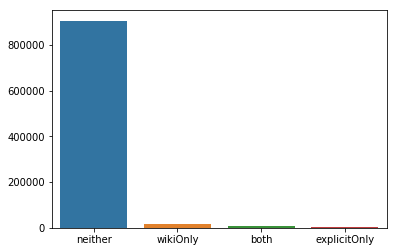

In [294]:
sns.barplot(x=merged_df_10yrs['tagCompare'].value_counts().index, y=merged_df_10yrs['tagCompare'].value_counts().values)

plt.show()